In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

### 1. Run a simple bivariate regression, and interpret your results. (Did the results fit your expectations? Why? Why not?)

In [2]:
d = pd.read_csv("GSS.2006.csv")
d.head()

,vpsu,vstrat,adults,ballot,dateintv,famgen,form,formwt,gender1,hompop,...,away7,gender14,old14,relate14,relhh14,relhhd14,relsp14,where12,where6,where7
0,1,1957,1,3,316,2,1,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1957,2,2,630,1,2,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1957,2,2,314,2,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1957,1,1,313,1,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1957,3,1,322,2,2,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I want to see if people ranked themselves in a higher social group because they made more money on average. Therefore, I use these variables:

1. RANK: In our society there are groups which tend to be towards the top and those that are towards the bottom. Here we have a scale that runs from top (1) to bottom (10). Where would you put yourself on this scale?

2. REALRINC: Respondent's income on 1972-1991 surveys in constant dollars (base=1986).


In [3]:
# Reverse rank - higher variable means higher rank
d['rrank']=11-(d['rank'])

In [4]:
# Turn income into 1000s of dollars for ease of interpretation
d['realrinc1000s'] = (d['realrinc'])/1000

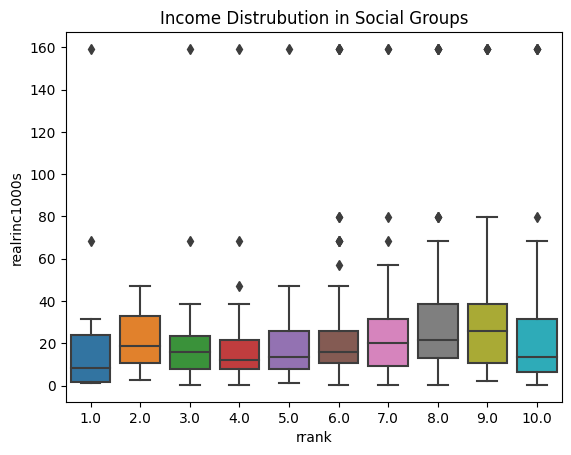

In [5]:
# Look at how income was distrubuted in each social group
# We can see that people who ranked themselves in a high social group tend to have a higher income, but there is some variability
sns.boxplot(x="rrank", y="realrinc1000s", data=d)
plt.title("Income Distrubution in Social Groups")
plt.show()

In [6]:
# Include only observations that also answer about their educational degree
dd = d.dropna(subset = ["degree"])

lm_rep = smf.ols(formula = 'rrank~realrinc1000s', data = dd).fit()
print (lm_rep.summary())

                            OLS Regression Results                            
Dep. Variable:                  rrank   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     24.02
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           1.13e-06
Time:                        20:46:28   Log-Likelihood:                -1809.6
No. Observations:                 911   AIC:                             3623.
Df Residuals:                     909   BIC:                             3633.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.3303      0.078     80.885

For every 1000 dollars more, a person ranked him or her self 0.0106 points higher in social groups on average. This is statistically significant since p-value < 0.05, and the model can only explain 2.6% of the variability in the rank since r-squared is 0.026. The result fits my expectation since individuals in higher social groups typically possess greater financial resources.

### 2. Add an additional variable that might mediate or partly "explain" the initial association from that simple regression above -- and explain your results. Did it work out? Yes? No?

The additional variable I add is the highest educational degree earned by respondent (DEGREE), because it may help explain the relationship between a higher income and a higher rank in social groups. Degrees in this variable are: Less than high school (0), High school, Associate/Junior college, Bachelor's, and Graduate (4).

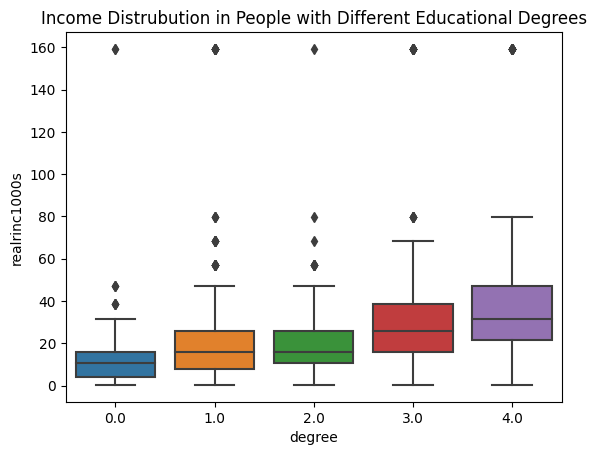

In [7]:
# Look at how income was distrubuted in people with different educational degrees
# We can see that people with higher educational degrees had higher incomes
sns.boxplot(x="degree", y="realrinc1000s", data=dd)
plt.title("Income Distrubution in People with Different Educational Degrees")
plt.show()

In [8]:
lm_rep = smf.ols(formula = 'rrank~realrinc1000s+degree', data = dd).fit()
print (lm_rep.summary())

                            OLS Regression Results                            
Dep. Variable:                  rrank   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     17.73
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           2.80e-08
Time:                        20:46:28   Log-Likelihood:                -1804.1
No. Observations:                 911   AIC:                             3614.
Df Residuals:                     908   BIC:                             3629.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.1133      0.101     60.319

When keeping income constant, individuals with a higher degree of education tend to be 0.17 points higher in their self-perceived social group ranking. But the educational degree hardly changes the income variable, so it does not really mediate the relationship between income and rank.

### 3. Run another multiple regression. Tell me how you expect your dependent variable to be affected by the independent variables. Interpret your results.

In [9]:
d = pd.read_csv("WVS.csv")
d.head()

,V1,V2,V2A,V3,V4,V5,V6,V7,V8,V9,...,V224_ESMA,V228_2,V243_AU,V244_AU,V248_CS,V253_CS,V256B,V256C,sacsecval,secvalwgt
0,6,12,12,1.0,1.0,1.0,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300476,1.0
1,6,12,12,2.0,1.0,2.0,3.0,4.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.301905,1.0
2,6,12,12,3.0,1.0,3.0,2.0,4.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.386071,1.0
3,6,12,12,4.0,1.0,1.0,3.0,4.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.344405,1.0
4,6,12,12,5.0,1.0,1.0,1.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.304167,1.0


Here, I focus on the question: Of course, we all hope that there will not be another war, but if it were to come to that, would you be willing to fight for your country? (V66) 1) Yes	2) No

For this question, I want to assign health condition, age, marital status, and sex as independent variables. And I expect people who were healthy, young, single, and male were more willing to fight for their country in a war.

In [10]:
d.rename(columns={'V66':'fight',
                  'V11':'health',
                  'V242':'age',
                  'V57':'marital',
                  'V240':'sex',
                  # 'V239' asks where you places yourself in the income distribution in your country
                  'V239':'ses'},
                  inplace=True)

In following codes, I change variables to be binary for better understanding and easier interpretation.

In [11]:
conditions = [
    (d['fight'] ==1) ,
     (d['fight'] !=1 )]
choices = [1,0]
d['ffight'] = np.select(conditions, choices, default=np.nan)

In [12]:
conditions = [
    (d['health'] <=2) ,
     (d['health'] >2 )]
choices = [1,0]
d['healthy'] = np.select(conditions, choices, default=np.nan)

In [13]:
conditions = [
    (d['marital'] ==1) ,
     (d['marital'] >1 )]
choices = [1,0]
d['married'] = np.select(conditions, choices, default=np.nan)

In [14]:
conditions = [
    (d['sex'] ==2) ,
     (d['sex'] !=2 )]
choices = [1,0]
d['female'] = np.select(conditions, choices, default=np.nan)

I am going to focus on China, which has a country code (V2) of 156.

In [15]:
# Include only observations that also answer about their income level
dd = d.dropna(subset = ["ses"])

lm1 = smf.ols(formula = 'ffight ~ healthy + age + female + married', data = dd, subset = (dd['V2']==156) ).fit()
print (lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                 ffight   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     19.40
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           1.11e-15
Time:                        20:46:32   Log-Likelihood:                -1152.2
No. Observations:                2042   AIC:                             2314.
Df Residuals:                    2037   BIC:                             2342.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8774      0.040     22.067      0.0

Based on the above results, we can see that women, older people and married people were less inclined to fight in a war, but age seems to be less influential compared to gender and marital status. Moreover, healthy people were more willing to fight in a war with 0.086 points more in affirmative responses compared to unhealthy people. These results fit my expectation, but the result of the "married" variable is not statistically significant with a p-value of 0.495.

### 4. Now add another independent variable to that model in Question 3, specifically a set of dummy variables. Tell me why you added that new set of variables and what effect you expected them to have. Did they have an effect? Interpret that new model.

Here I add the variable asking where you places yourself in the income distribution in your country (V239/SES), because I guess that people with higher incomes may be less inclined to fight in a war.

In [16]:
# Break each category in the SES variable to be dummy variables
ddsub = pd.concat([dd.ffight, dd.healthy, dd.age, dd.female, dd.married, dd.V2,
                   pd.get_dummies(dd.ses.astype(int), prefix='ses')],  axis = 1 )
ddsub.columns

Index(['ffight', 'healthy', 'age', 'female', 'married', 'V2', 'ses_1', 'ses_2',
       'ses_3', 'ses_4', 'ses_5', 'ses_6', 'ses_7', 'ses_8', 'ses_9',
       'ses_10'],
      dtype='object')

In [17]:
lm2 = smf.ols(formula = 'ffight ~ healthy + age + female + married + ses_2 + ses_3 + ses_4 + ses_5 + ses_6 + ses_7 + ses_8 + ses_9 + ses_10', data = ddsub, subset = (ddsub['V2']==156) ).fit()
print (lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                 ffight   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     7.136
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           9.20e-14
Time:                        20:46:32   Log-Likelihood:                -1144.7
No. Observations:                2042   AIC:                             2317.
Df Residuals:                    2028   BIC:                             2396.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9183      0.054     17.031      0.0

The above results tell us that people with higher incomes were less inclined to fight in a war, shown by a general change from a -0.053 coefficient of ses_2 to a -0.385 coefficient of ses_10. But not every case shows the effect, and most of these cases are not statistically significantly on their own.